# **Unicorn Companies 2**

In this activity, you will practice structuring, an **exploratory data analysis (EDA)** step that helps data science projects move forward. During EDA, when working with data that contains aspects of date and time, "datetime" transformations are integral to better understanding the data. As a data professional, you will encounter datetime transformations quite often as you determine how to format your data to suit the problems you want to solve or the questions you want to answer.

In this activity, you are a member of an analytics team that provides insights to an investing firm. To help them decide which companies to invest in next, the firm wants insights into **unicorn companies**–companies that are valued at over one billion dollars.  

You will work with a dataset about unicorn companies, discovering characteristics of the data, structuring the data in ways that will help you draw meaningful insights, and using visualizations to analyze the data. Ultimately, you will draw conclusions about what significant trends or patterns you find in the dataset. This will develop your skills in EDA and your knowledge of functions that allow you to structure data.

In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/Users/timothypark/Documents/portfolios/timpark99.github.io/Unicorn Companies 2/unicorn_companies.csv')

In [66]:
df.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,4/7/17,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,12/1/12,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,7/3/18,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,1/23/14,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,12/12/11,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."


In [67]:
df.shape

(1074, 10)

In [68]:
df.drop_duplicates().shape

(1074, 10)

- Since the shape that is returned after dropping duplicates is the same as the shape of the original DataFrame, you can infer that there are no duplicate values in the dataset. 

In [70]:
df.dtypes

Company             object
Valuation           object
Date Joined         object
Industry            object
City                object
Country/Region      object
Continent           object
Year Founded         int64
Funding             object
Select Investors    object
dtype: object

In [71]:
df.sort_values(by="Year Founded", ascending=False).head(10)

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
782,Phantom,$1B,1/31/22,Fintech,San Francisco,United States,North America,2021,$118M,"Paradigm, Andreessen Horowitz, Jump Capital"
714,Yidian Zixun,$1B,10/17/17,Mobile & telecommunications,Beijing,China,Asia,2021,$151M,"Phoenix New Media, Tianjin Haihe Industry Fund"
822,GlobalBees,$1B,12/28/21,E-commerce & direct-to-consumer,New Delhi,India,Asia,2021,$185M,"Chiratae Ventures, SoftBank Group, Trifecta Ca..."
554,ClickHouse,$2B,10/28/21,Data management & analytics,Portola Valley,United States,North America,2021,$300M,"Lightspeed Venture Partners, Almaz Capital Par..."
952,LayerZero Labs,$1B,3/30/22,Internet software & services,New York,United States,North America,2021,$143M,"Andreessen Horowitz, FTX Ventures, Tiger Globa..."
314,Flink Food,$3B,12/1/21,E-commerce & direct-to-consumer,Berlin,Germany,Europe,2021,$1B,"Mubadala Capital, Bond, Prosus Ventures"
864,Aptos,$1B,3/15/22,Internet software & services,Palo Alto,United States,North America,2021,$200M,"Andreessen Horowitz, Coinbase Ventures, Tiger ..."
238,Yuga Labs,$4B,3/22/22,Fintech,Miami,United States,North America,2021,$450M,"Andreessen Horowitz, Thrive Capital, Sound Ven..."
775,Jokr,$1B,12/2/21,E-commerce & direct-to-consumer,New York,United States,North America,2021,$430M,"GGV Capital, Tiger Global Management, Greycroft"
967,Mensa Brands,$1B,11/16/21,Other,Bengaluru,India,Asia,2021,$218M,"Accel, Falcon Edge Capital, Norwest Venture Pa..."


### Determine the number of companies founded each year

Find out how many companies in this dataset were founded each year. Make sure to display each unique `Year Founded` that occurs in the dataset, and for each year, a number that represents how many companies were founded then.

In [73]:
df["Year Founded"].value_counts().sort_values(ascending=False)

Year Founded
2015    155
2016    110
2014    109
2012     95
2013     87
2011     82
2017     74
2018     61
2019     45
2010     40
2009     34
2008     27
2020     25
2007     24
2006     15
2005     14
2000     11
2021     11
2001      9
1999      8
2004      8
2003      8
1998      5
2002      4
1994      2
1995      2
1992      1
1993      1
1990      1
1984      1
1996      1
1979      1
1991      1
1919      1
1997      1
Name: count, dtype: int64

Plot a histogram of the `Year Founded` feature.

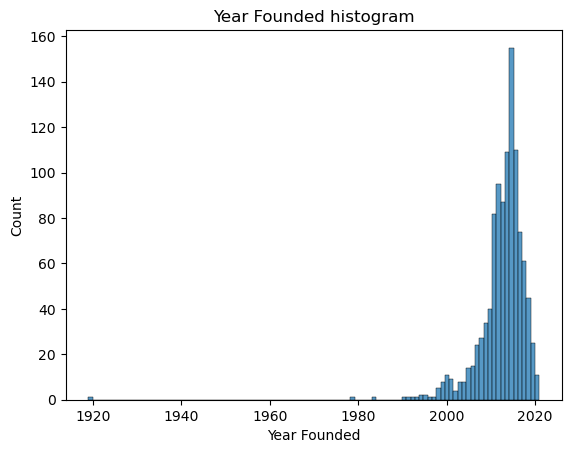

In [75]:
sns.histplot(data=df, x='Year Founded')
plt.title('Year Founded histogram');

### Convert the `Date Joined` column to datetime

Convert the `Date Joined` column to datetime. This will split each value into year, month, and date components, allowing you to later gain insights about when a company gained unicorn status with respect to each component.

In [77]:
df['Date Joined'] = pd.to_datetime(df['Date Joined'])
df.dtypes

/var/folders/5z/f5jycvmd0x58dvn1by8xk79h0000gn/T/ipykernel_76402/1219924513.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date Joined'] = pd.to_datetime(df['Date Joined'])


Company                     object
Valuation                   object
Date Joined         datetime64[ns]
Industry                    object
City                        object
Country/Region              object
Continent                   object
Year Founded                 int64
Funding                     object
Select Investors            object
dtype: object

### Create a `Month Joined` column

Obtain the names of the months when companies gained unicorn status, and use the result to create a `Month Joined` column.

In [79]:
df["Month Joined"] = df["Date Joined"].dt.month_name()
df.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Month Joined
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",April
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",December
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",July
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",January
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",December


### Create a `Years To Join` column

Determine how many years it took for companies to reach unicorn status, and use the result to create a `Years To Join` column. Adding this to the dataset can help you answer questions you may have about this aspect of the companies.

In [81]:
df["Years To Join"] = df["Date Joined"].dt.year - df["Year Founded"]
df.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Month Joined,Years To Join
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",April,5
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",December,10
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",July,10
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",January,4
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",December,6


### Gain more insight on a specific year

To get more insight on the year of that interests you, filter the dataset by that year and save the resulting subset into a new variable. 

In [83]:
df_2021 = df[df["Date Joined"].dt.year == 2021]
df_2021.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Month Joined,Years To Join
12,FTX,$32B,2021-07-20,Fintech,NaN,Bahamas,North America,2018,$2B,"Sequoia Capital, Thoma Bravo, Softbank",July,3
16,J&T Express,$20B,2021-04-07,"Supply chain, logistics, & delivery",Jakarta,Indonesia,Asia,2015,$5B,"Hillhouse Capital Management, Boyu Capital, Se...",April,6
24,Blockchain.com,$14B,2021-02-17,Fintech,London,United Kingdom,Europe,2011,$490M,"Lightspeed Venture Partners, Google Ventures, ...",February,10
27,OpenSea,$13B,2021-07-20,E-commerce & direct-to-consumer,New York,United States,North America,2017,$427M,"Andreessen Horowitz, Thirty Five Ventures, Sou...",July,4
34,Getir,$12B,2021-03-26,E-commerce & direct-to-consumer,Istanbul,Turkey,Europe,2015,$2B,"Tiger Global Management, Sequoia Capital, Revo...",March,6


### Observe trends over time

Implement the structuring approach that you have identified to observe trends over time in the companies that became unicorns for the year that interests you.

In [85]:
# insert allows you to pick where you want the new column to appear in the first argument here which is 3
# the last 'True' input means that we're allowing duplicates if there's a column already named 'Week Joined'
df_2021.insert(3, "Week Joined", df_2021["Date Joined"].dt.strftime('%Y-W%V'), True)

df_by_week_2021 = df_2021.groupby("Week Joined")["Company"].count().reset_index().rename(columns={"Company":"Company Count"})

df_by_week_2021.head()

,Week Joined,Company Count
0,2021-W01,12
1,2021-W02,9
2,2021-W03,5
3,2021-W04,8
4,2021-W05,4


### Compare trends over time

Implement the structuring approach that you have identified in order to compare trends over time in the average valuation of companies that became unicorns between your years of interest. Keep in mind the data type of the `Valuation` column and what the values in that column contain currently.

In [87]:
# After identifying the additional year and time interval of interest, proceed with the following:
# Step 1. Filter by the additional year to create a subset that consists of companies that joined in that year.
# Step 2. Concatenate that new subset with the subset that you defined previously.
# Step 3. As needed, add a column that contains the time interval that each data point belongs to, 
#         in the concatenated DataFrame.
# Step 4. Transform the `Valuation` column as needed.
# Step 5. Group by the time interval.
#         Aggregate by computing average valuation of companies that joined per interval of the corresponding year.
#         Save the resulting DataFrame in a new variable.

# Filter by the additional year to create a subset that consists of companies that joined in that year.
df_2020 = df[df["Date Joined"].dt.year == 2020]

# Concatenate the new subset with the subset that you defined previously.
df_2020_2021 = pd.concat([df_2020, df_2021.drop(columns="Week Joined")])

# Add `Quarter Joined` column to `companies_2021`.
df_2020_2021["Quarter Joined"] = df_2020_2021["Date Joined"].dt.to_period('Q').dt.strftime('%Y-Q%q')

# Convert the `Valuation` column to numeric by removing `$` and `B` and casting each value to data type `float`.
df_2020_2021["Valuation"] =  df_2020_2021["Valuation"].str.strip("$B").astype(float)

# Group `df_2020_2021` by `Quarter Joined`, 
# Aggregate by computing average `Funding` of companies that joined per quarter of each year.
# Save the resulting DataFrame in a new variable.
df_by_quarter_2020_2021 = df_2020_2021.groupby(by="Quarter Joined")["Valuation"].mean().reset_index().rename(columns={"Valuation":"Average Valuation"})

# Display the rows of the new DataFrame to confirm that it was created.
df_by_quarter_2020_2021


,Quarter Joined,Average Valuation
0,2020-Q1,3.444444
1,2020-Q2,3.777778
2,2020-Q3,3.896552
3,2020-Q4,3.697674
4,2021-Q1,2.750000
5,2021-Q2,2.340278
6,2021-Q3,2.291045
7,2021-Q4,1.850746


### Visualize the time it took companies to become unicorns

As a next step, visualize your data. Using the `df` dataset, create a box plot to visualize the distribution of how long it took companies to become unicorns, with respect to the month they joined. 

In [89]:
# Define a list that contains months in chronological order.
month_order = ["January", "February", "March", "April", "May", "June",
               "July", "August", "September", "October", "November", 
               "December"]

# Print out the list to confirm it is correct.
print(month_order)
            

['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']


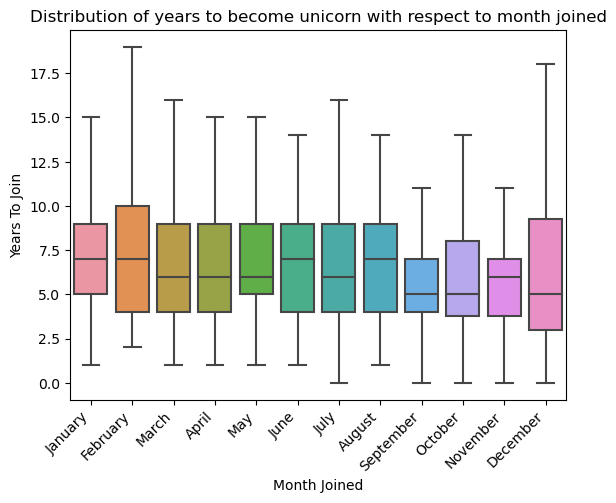

In [90]:
# Create the box plot to visualize the distribution of how long it took companies to become unicorns, with respect to the month they joined.
# Make sure the x-axis goes in chronological order by month, using the list you defined previously.
# Plot the data from the `companies` DataFrame.

# showfliers=False doesn't show outliers
sns.boxplot(x=df['Month Joined'], 
            y=df['Years To Join'], 
            order=month_order, 
            showfliers=False)

# Set the title of the plot.
plt.title('Distribution of years to become unicorn with respect to month joined')

# Rotate labels on the x-axis as a way to avoid overlap in the positions of the text. 
plt.xticks(rotation=45, horizontalalignment='right')

# Display the plot.
plt.show()


### Visualize the time it took companies to reach unicorn status

In this section, you will evaluate the result of structuring the data, making observations, and gaining further insights about the data. 

Using the `df` dataset, create a bar plot to visualize the average number of years it took companies to reach unicorn status with respect to when they were founded. 

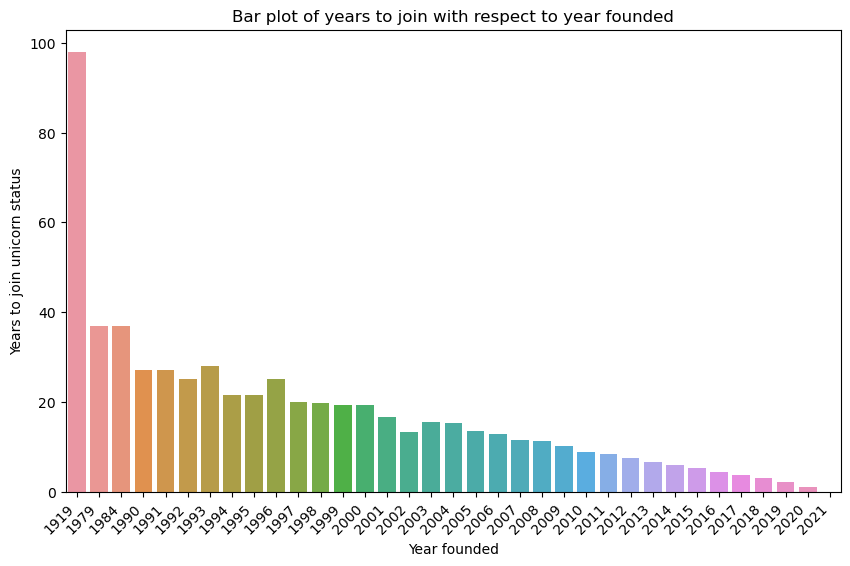

In [92]:
# Set the size of the plot.
plt.figure(figsize=(10,6))

# Create bar plot to visualize the average number of years it took companies to reach unicorn status with respect to when they were founded.
# Plot data from the `df` DataFrame.
# errorbar=('ci', False) hides the confidence interval bar from showing
sns.barplot(x=df["Year Founded"], y=df["Years To Join"], errorbar=('ci', False))

# Set title
plt.title("Bar plot of years to join with respect to year founded")


# Set x-axis label
plt.xlabel("Year founded")


# Set y-axis label
plt.ylabel("Years to join unicorn status")


# Rotate the labels on the x-axis as a way to avoid overlap in the positions of the text.  
plt.xticks(rotation=45, horizontalalignment='right')

# Display the plot.
plt.show()

- There appears to be a trend wherein companies that were founded later took less time to reach unicorn status, on average. 

**Note:** This is a bias that is common in time data—because companies founded in later years have been around for less time. Therefore, there is less time to collect data on such companies compared to companies founded in earlier years). 

### Visualize the number of companies that joined per interval 

Using the subset of companies joined in the year of interest, grouped by the time interval of your choice, create a bar plot to visualize the number of companies that joined per interval for that year.

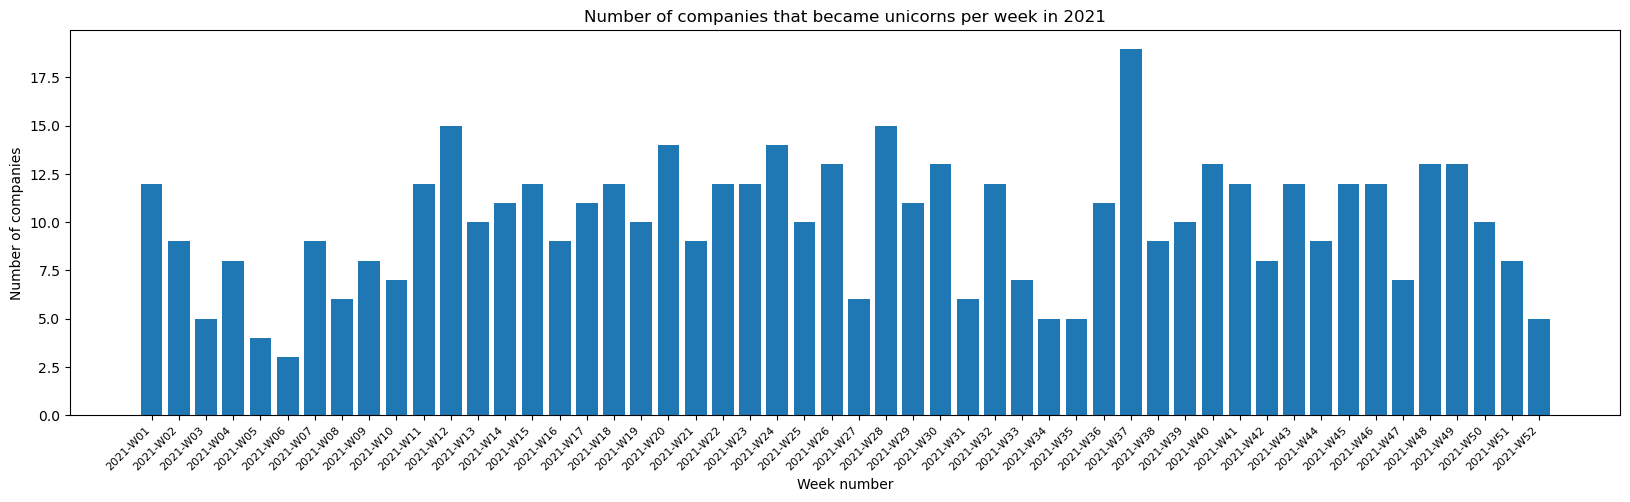

In [95]:
# Set the size of the plot.
plt.figure(figsize = (20, 5))

# Create a bar plot to visualize number of companies that joined per interval for the year of interest.
plt.bar(x=df_by_week_2021['Week Joined'],height=df_by_week_2021['Company Count'])
plt.plot()

# Set the x-axis label.
plt.xlabel("Week number")

# Set the y-axis label.
plt.ylabel("Number of companies")

# Set the title.
plt.title("Number of companies that became unicorns per week in 2021")

# Rotate the labels on the x-axis as a way to avoid overlap in the positions of the text.  
plt.xticks(rotation = 45, horizontalalignment='right', fontsize=8)

# Display the plot.
plt.show()

- Observations from a bar plot of the number of companies that became unicorns per week in 2021:

  - The number of companies that joined unicorn status fluctuated over the weeks of 2021, with a trend of decline followed by increase occurring periodically.
  - The highest number of companies reached $1 billion valuation in Week 37 of 2021, which corresponds to the third week of September 2021. 
  - The weeks in 2021 with the next highest number of companies becoming unicorns are Week 12 (which corresponds to the fourth week of March) and Week 28 (which corresponds to the third week of July). 

### Visualize the average valuation over the quarters

Using the subset of companies that joined in the years of interest, create a grouped bar plot to visualize the average valuation over the quarters, with two bars for each time interval. There will be two bars for each time interval. This allows you to compare quarterly values between the two years.

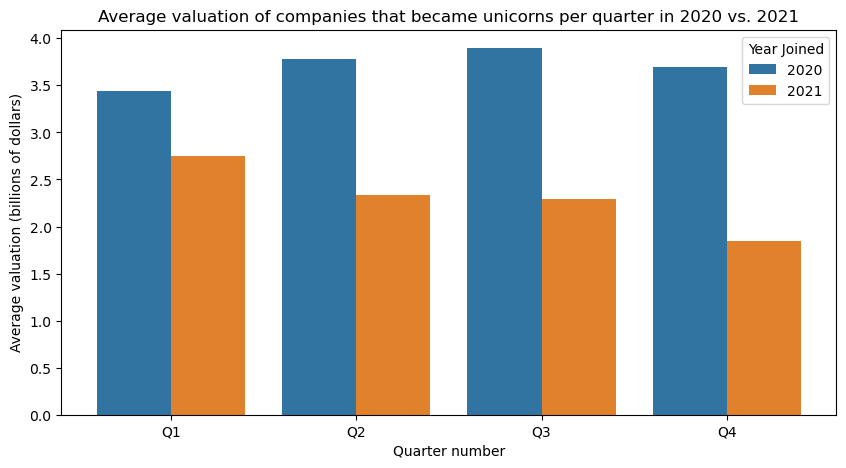

In [98]:
# Using slicing, extract the year component and the time interval that you specified, 
# and save them by adding two new columns into the subset. 

df_by_quarter_2020_2021['Quarter Number'] = df_by_quarter_2020_2021['Quarter Joined'].str[-2:]
df_by_quarter_2020_2021['Year Joined'] = df_by_quarter_2020_2021['Quarter Joined'].str[:4]

# Set the size of the plot.
plt.figure(figsize = (10, 5))

# Create a grouped bar plot.
sns.barplot(x=df_by_quarter_2020_2021['Quarter Number'],
            y=df_by_quarter_2020_2021['Average Valuation'],
            hue=df_by_quarter_2020_2021['Year Joined'])
plt.plot()

# Set the x-axis label.
plt.xlabel("Quarter number")

# Set the y-axis label.
plt.ylabel("Average valuation (billions of dollars)")

# Set the title.
plt.title("Average valuation of companies that became unicorns per quarter in 2020 vs. 2021")

# Display the plot.
plt.show()

**Question:** What do you observe from the preceding grouped bar plot?

- Observations from a grouped bar plot of average valuation of companies that became unicorns per quarter in 2020 vs. 2021:

  - In each quarter, the average valuation of companies that joined unicorn status was higher in 2020 than in 2021. 
  - In 2020, Q3 was the quarter with the highest average valuation of companies that reached unicorn status, and there was a trend of increase from Q1 to Q2 and from Q2 to Q3. 
  - In 2021, Q1 was the quarter with the highest average valuation of companies that reached unicorn status, and there was a trend of decrease across the quarters.

**Question:** Is there any bias in the data that could potentially inform your analysis?

- Potential bias:

  - If there were bias in terms of which cities and countries were taken into account when collecting the data, then the analysis would be more representative of the cities and countries that are in the dataset than those that are not.
  - If the dataset did not include certain industries, then the analysis would be more representative of the industries that are included and may not reflect trends in those that are excluded from the data. 
  - If the dataset had time gaps, (e.g., if companies that joined in certain windows of time were not included in the data), then that may have affected the patterns observed, depending on how salient the gaps were.
  - Another point of bias pertains to the nature of time data; there have been fewer years to collect data on companies that were founded more recently than for companies that were founded longer ago.
 
**Question:** What potential next steps could you take with your EDA?
 
- Potential next steps with EDA: 

  - Analyze the data with respect to industries of unicorn companies at different datetime intervals.
  - Analyze the data with respect to cities or countries where unicorn companies were founded at different datetime intervals.
  - Clean the data as needed.

## Considerations

**What are some key takeaways that you learned from this lab?**

- Functions in the `pandas` library can be used for data manipulation in order to reorganize and structure the data.
- Converting strings that contain dates to datetime format allow you to extract individual components from the data, such as month and year.
- Structuring the data in specific ways allows you to observe more trends and zoom in on parts of the data that are interesting to you.
- Functions in the `matplotlib.pyplot` module and the `seaborn` library can be used to create visualizations to gain further insight after structuring the data.

**What findings would you share with others?**

- There are 1074 unicorn companies represented in this dataset.
- 2015 is the year when the most number of unicorn companies were founded. 
- Many of the unicorn companies that were founded in 2021 were founded in the United States and belong to "Fintech", "E-commerce & direct-to-consumer", and "Internet software & services" industries. 
- The box plot created shows that companies that become unicorns in the months of September and October have a smaller median value for how long it took to become unicorns.
- One of the bar plots created shows that the average valuation of companies that joined in 2020 is highest in the third quarter of the year, whereas the average valuation of companies that joined in 2021 is highest in the first quarter of the year.

**What recommendations would you share with stakeholders based on these findings?**

- According to data analysis that was conducted on a dataset of 1074 unicorn companies, companies that joined in the months of September and October tended to take less time to become unicorns.
- Another finding was that many of the unicorn companies that were founded in 2021 were founded in the United States and belong to "Fintech", "E-commerce & direct-to-consumer", and "Internet software & services" industries. So if the stakeholders want to invest in companies founded in 2021, it would be a good idea to consider companies that belong to these industries, as they may be strong candidates for becoming unicorns.
- It was also discovered that the average valuation of companies that joined in 2021 is highest in the first quarter of the year, and the average valuation of companies that joined in 2020 is the third quarter of the year. When considering companies that newly join in the future, it would be worth closely looking at companies that join in the first and third quarters of the year. 
- The data can be analyzed further to gather more insights that are specific to the interests of the investing firm and the stakeholders. 